In [1]:
import itertools

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

import bioframe as bf

In [2]:
def _draw_region(start, end, level, color="skyblue", height=0.6, ax=None):
    ax = plt.gca() if ax is None else ax
    ax.add_patch(
        matplotlib.patches.Rectangle(
            (start,  level - height/2), 
            end-start, 
            height, 
            facecolor=color,
            edgecolor='dimgray'))

    
def draw_regions_arr(
    starts,
    ends,
    levels=None,
    colors='skyblue',
    xlim=None,
    show_coords=False, 
):
  
    starts = np.asarray(starts)
    ends = np.asarray(ends)
    
    plt.figure(figsize=(10,2))

    if levels is None:
        levels = bf.arrops.stack_intervals(starts, ends) 
    else: 
        levels = np.asarray(levels)
    if isinstance(colors, str):
        colors = itertools.cycle([colors])
    else:
        colors = itertools.cycle(colors)
    for start, end, level, color in zip(starts, ends, levels, colors):
        _draw_region(start, end, level, color=color)

    plt.ylim(-0.5, np.max(levels)+0.5)
    if xlim is None:
        plt.xlim(-0.5, np.max(ends)+0.5)
    else:
        plt.xlim(xlim[0], xlim[1])
    plt.gca().set_aspect(1)

    plt.gca().set_frame_on(False)
    plt.yticks([]);
    if show_coords:
        pass
    else:
        plt.xticks([]);


def draw_regions(
    df,
    levels=None,
    colors='skyblue',
    xlim=None,
    show_coords=False, 
):
    
    for chrom, chrom_gb in df.groupby('chrom'):
        draw_regions_arr(
            chrom_gb.start, 
            chrom_gb.end, 
            levels=levels, 
            colors=colors,
            xlim=xlim,
            show_coords=show_coords
        )
        plt.title(chrom)
  


# Dataframe operations

## Overlap

In [3]:
df1 = pd.DataFrame([
    ['chr1', 1, 5],
    ['chr1', 3, 8],
    ['chr1', 8, 10],
    ['chr1', 12, 14]],
    columns=['chrom', 'start', 'end']
)

df2 = pd.DataFrame([
    ['chr1', 4, 8]],
    columns=['chrom', 'start', 'end']
)

(-0.5, 14.5)

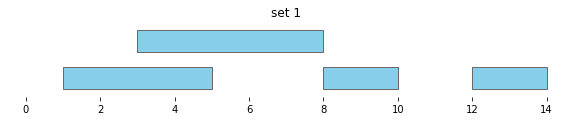

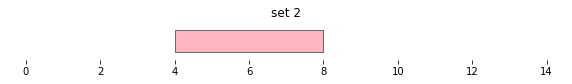

In [4]:
draw_regions(df1, show_coords=True)
plt.title('set 1')

draw_regions(df2, show_coords=True, colors='lightpink')
plt.title('set 2')
plt.xlim(-0.5,14.5)

In [5]:
overlapping_intervals = bf.overlap(df1, df2)
display(overlapping_intervals)

,chrom_1,start_1,end_1,chrom_2,start_2,end_2,overlap_start,overlap_end
0,chr1,1,5,chr1,4,8,4,5
1,chr1,3,8,chr1,4,8,4,8


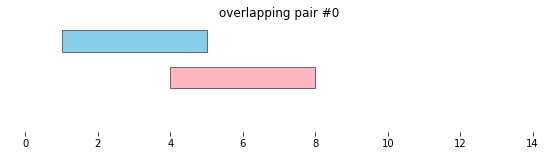

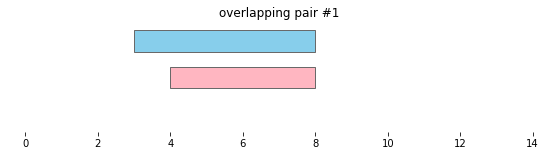

In [6]:
for i, reg_pair in overlapping_intervals.iterrows(): 
    draw_regions_arr(
        starts = [reg_pair.start_1,reg_pair.start_2],
        ends = [reg_pair.end_1,reg_pair.end_2],
        colors = ['skyblue', 'lightpink'],
        levels = [2,1],
        xlim = (-0.5,14.5),
        show_coords = True)
    plt.title(f'overlapping pair #{i}')

## Merge

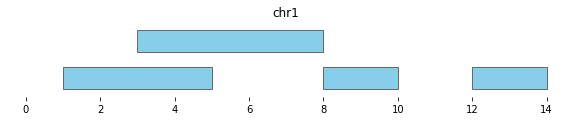

In [7]:
df1 = pd.DataFrame([
    ['chr1', 1, 5],
    ['chr1', 3, 8],
    ['chr1', 8, 10],
    ['chr1', 12, 14],
    ],
    columns=['chrom', 'start', 'end']
)

draw_regions(df1, show_coords=True)

In [8]:
df_annotated, df_merged = bf.merge(df1, min_dist=0)
display(df_annotated)

,chrom,start,end,cluster
0,chr1,1,5,0
1,chr1,3,8,0
2,chr1,8,10,0
3,chr1,12,14,1


In [9]:
display(df_merged)

,chrom,start,end,count
0,chr1,1,10,3
1,chr1,12,14,1


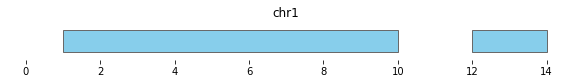

In [10]:
draw_regions(df_merged, show_coords=True)

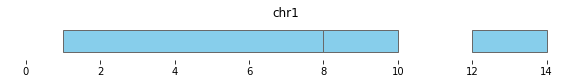

In [11]:
df_annotated, df_merged = bf.merge(df1, min_dist=None)
draw_regions(df_merged, show_coords=True)

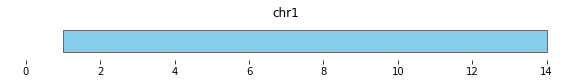

In [12]:
df_annotated, df_merged = bf.merge(df1, min_dist=2)
draw_regions(df_merged, show_coords=True)

## Complement

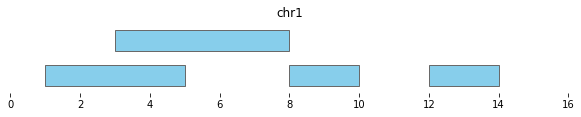

In [13]:
draw_regions(df1, show_coords=True, xlim=(0,16))

In [14]:
df_complemented = bf.complement(df1)
display(df_complemented)

,chrom,start,end
0,chr1,0,1
1,chr1,10,12
2,chr1,14,9223372036854775807


In [15]:
df_complemented = bf.complement(df1, chromsizes={'chr1':16})
display(df_complemented)

,chrom,start,end
0,chr1,0,1
1,chr1,10,12
2,chr1,14,16


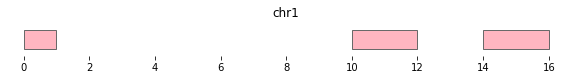

In [16]:
draw_regions(df_complemented, show_coords=True, colors='lightpink')